# German Bank

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif, chi2
from sklearn.model_selection import train_test_split

In [3]:
%matplotlib inline

In [4]:
sns.set_theme()

## Load Data

### Features

|               字段名             |                       详细含义                    |
|:-------------------------------:|:-------------------------------------------------|
|**Creditability**                |是否有信用：1:有信用（即无违约用户），0:无信用（即违约用户）|
|Account Balance                  |现存支票账户状态，1：月流水为0，2：月流水小于200马克，3：月流水大于等于200马克，4：未创建账户|
|**Duration of Credit (month)**   |贷款时长|
|Payment Status of Previous Credit|历史信用情况。0：没有历史贷款或全部如期归还，1：在该银行的贷款已被全部归还，2：存在仍需还款的贷款，3：出现过延期归还情况，4：在其他银行仍存在贷款|
|Purpose                          |贷款目的。0：汽车（新），1：汽车（二手），2：家具装备，3：广播设备电视，4：家用电器，5：维修需要，6：教育，7：度假，8：再培训深造，9：生意，10：其他|
|**Credit Amount**                |贷款金额|
|Value Savings/Stocks             |储蓄账户状态。1：储蓄金额小于100马克，2：储蓄金额大于等于100马克小于500马克，3：储蓄金额大于等于500马克小于1000马克，4：储蓄金额大于等于1000马克，5：未知或不存在储蓄账户|
|Length of current employment     |就职持续时间。1：暂无工作，2：就职小于1年，3：就职大于等于1年小于4年，4：就职大于等于4年小于7年，5：就职大于等于7年|
|**Instalment per cent**          |分期付款百分比|
|Sex & Marital Status             |性别与婚姻状况。1：男性离婚或分居，2：女性离婚、分居或已婚，3：男性单身，4：男性已婚或丧偶，5：女性单身|
|Guarantors                       |担保人。1：无担保人，2：联保，3：有担保人|
|**Duration in Current address**      |当前住所的定居时间|
|Most valuable available asset    |最有价值的资产。1：房地产，2：社保或人寿保险，3：汽车或其他，4：未知或无财产|
|**Age (years)**                      |年龄|
|Concurrent Credits               |其他分期付款情况。1：银行，2：商铺，3：无|
|Type of apartment                |住房类型。1：租赁，2：自己拥有，3：可免费居住|
|**No of Credits at this Bank**   |在这家银行的信用额度|
|Occupation                       |职业。1：失业/非技术人员-非居民，2：非技术人员-居民，3：技术人员/官员，4：管理层/个体经营/高素质员工/管理人员|
|**No of dependents**             |供养人口数量|
|Telephone                        |是否有以客户名称注册的电话.1：没有，2：有|
|Foreign Worker                   |外籍工作者。1：是，2：不是|


In [5]:
qualitative_columns = [
#     'Creditability', 
    'Duration of Credit (month)',
    'Credit Amount',
    'Instalment per cent', 
    'Duration in Current address', 
    'Age (years)', 
    'No of Credits at this Bank', 
    'No of dependents',
]
quantitative_columns = [
    'Account Balance', 
    'Payment Status of Previous Credit', 
    'Purpose', 
    'Value Savings/Stocks', 
    'Length of current employment',
    'Sex & Marital Status', 
    'Guarantors',
    'Most valuable available asset',
    'Concurrent Credits', 
    'Type of apartment',
    'Occupation', 
    'Telephone', 
    'Foreign Worker'
]

In [6]:
data = pd.read_excel("GermanBank.xlsx")

In [7]:
data

,Creditability,Account Balance,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Value Savings/Stocks,Length of current employment,Instalment per cent,Sex & Marital Status,...,Duration in Current address,Most valuable available asset,Age (years),Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
0,1,1,18,4,2,1049,1,2,4,2,...,4,2,21,3,1,1,3,1,1,1
1,1,1,9,4,0,2799,1,3,2,3,...,2,1,36,3,1,2,3,2,1,1
2,1,2,12,2,9,841,2,4,2,2,...,4,1,23,3,1,1,2,1,1,1
3,1,1,12,4,0,2122,1,3,3,3,...,2,1,39,3,1,2,2,2,1,2
4,1,1,12,4,0,2171,1,3,4,3,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,1,24,2,3,1987,1,3,2,3,...,4,1,21,3,1,1,2,2,1,1
996,0,1,24,2,0,2303,1,5,4,3,...,1,1,45,3,2,1,3,1,1,1
997,0,4,21,4,0,12680,5,5,4,3,...,4,4,30,3,3,1,4,1,2,1
998,0,2,12,2,3,6468,5,1,2,3,...,1,4,52,3,2,1,4,1,2,1


### Standarded Data

In [8]:
scaler = StandardScaler()

In [9]:
standard_data = data.copy()
standard_data[qualitative_columns] = pd.DataFrame(
    scaler.fit_transform(data[qualitative_columns]),
    columns=qualitative_columns
)

In [10]:
standard_data[qualitative_columns].describe()

,Duration of Credit (month),Credit Amount,Instalment per cent,Duration in Current address,Age (years),No of Credits at this Bank,No of dependents
count,1.000000e+03,1000.000000,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03,1.000000e+03
mean,1.136868e-16,0.000000,9.947598e-17,-1.749711e-16,-1.278977e-16,-9.148238e-17,-1.509903e-17
std,1.000500e+00,1.000500,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00,1.000500e+00
min,-1.402415e+00,-1.070856,-1.764514e+00,-1.672459e+00,-1.457831e+00,-7.049260e-01,-4.282896e-01
25%,-7.386675e-01,-0.675476,-8.701833e-01,-7.659773e-01,-7.527986e-01,-7.049260e-01,-4.282896e-01
50%,-2.408572e-01,-0.337339,2.414692e-02,1.405047e-01,-2.240241e-01,-7.049260e-01,-4.282896e-01
75%,2.569531e-01,0.248464,9.184772e-01,1.046987e+00,5.691376e-01,1.027079e+00,-4.282896e-01
max,4.239436e+00,5.370764,9.184772e-01,1.046987e+00,3.477397e+00,4.491089e+00,2.334869e+00


In [11]:
standard_data.loc[standard_data['Foreign Worker'] == 2, 'Foreign Worker'] = 0

In [12]:
standard_data.loc[standard_data['Telephone'] == 1, 'Telephone'] = 0
standard_data.loc[standard_data['Telephone'] == 2, 'Telephone'] = 1

In [13]:
standard_data.to_excel("GermnnBank_Standard_Data.xlsx")

## Describe Data

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Creditability                      1000 non-null   int64
 1   Account Balance                    1000 non-null   int64
 2   Duration of Credit (month)         1000 non-null   int64
 3   Payment Status of Previous Credit  1000 non-null   int64
 4   Purpose                            1000 non-null   int64
 5   Credit Amount                      1000 non-null   int64
 6   Value Savings/Stocks               1000 non-null   int64
 7   Length of current employment       1000 non-null   int64
 8   Instalment per cent                1000 non-null   int64
 9   Sex & Marital Status               1000 non-null   int64
 10  Guarantors                         1000 non-null   int64
 11  Duration in Current address        1000 non-null   int64
 12  Most valuable availab

### Qualitative Search

In [219]:
data[qualitative_columns].describe().to_excel("qualitative_columns_describe.xlsx")

In [220]:
data[quantitative_columns].describe().to_excel("quantitative_columns_describe.xlsx")

In [216]:
data.corr()['Creditability'].abs() > 0.2

Creditability                         True
Account Balance                       True
Duration of Credit (month)            True
Payment Status of Previous Credit     True
Purpose                              False
Credit Amount                        False
Value Savings/Stocks                 False
Length of current employment         False
Instalment per cent                  False
Sex & Marital Status                 False
Guarantors                           False
Duration in Current address          False
Most valuable available asset        False
Age (years)                          False
Concurrent Credits                   False
Type of apartment                    False
No of Credits at this Bank           False
Occupation                           False
No of dependents                     False
Telephone                            False
Foreign Worker                       False
Name: Creditability, dtype: bool

In [226]:
features_chi2[0]

array([   1,   21,    3, 1049,   18,    1,    4,    2,    2,    1,    4,
          2,    2,    1,    1], dtype=int64)

### Quantitative Search

In [42]:
for label in quantitative_columns:
    print(data[label].value_counts().sort_values(ascending=False))
    print("-" * 32)

4    394
1    274
2    269
3     63
Name: Account Balance, dtype: int64
--------------------------------
2    530
4    293
3     88
1     49
0     40
Name: Payment Status of Previous Credit, dtype: int64
--------------------------------
3     280
0     234
2     181
1     103
9      97
6      50
5      22
4      12
10     12
8       9
Name: Purpose, dtype: int64
--------------------------------
1    603
5    183
2    103
3     63
4     48
Name: Value Savings/Stocks, dtype: int64
--------------------------------
3    339
5    253
4    174
2    172
1     62
Name: Length of current employment, dtype: int64
--------------------------------
3    548
2    310
4     92
1     50
Name: Sex & Marital Status, dtype: int64
--------------------------------
1    907
3     52
2     41
Name: Guarantors, dtype: int64
--------------------------------
3    332
1    282
2    232
4    154
Name: Most valuable available asset, dtype: int64
--------------------------------
3    814
1    139
2     47
Name: Con

In [27]:
data_male = data[data['Sex & Marital Status'].isin([1, 3, 4])]

In [32]:
data_female = data[data['Sex & Marital Status'].isin([2, 5])]

In [ ]:
data_male

## Analysis Data

<AxesSubplot:>

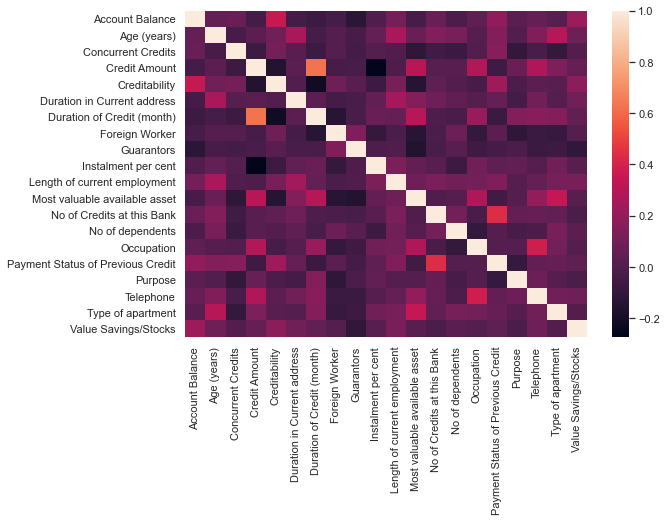

In [24]:
fig, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(data[data.columns.difference(['Sex & Marital Status'])].corr())

## Classification

### Select features

In [14]:
features = standard_data[standard_data.columns.difference(['Creditability'])]
# features_quantitative = standard_data[quantitative_columns]
labels = standard_data['Creditability']

In [57]:
features_chi2 = SelectKBest(chi2, k=15).fit_transform(
    data[data.columns.difference(['Creditability'])],
    data['Creditability'],
)

In [111]:
from sklearn.decomposition import PCA

In [ ]:
PCA.

### SVM

In [187]:
from sklearn import svm

In [233]:
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.4, random_state=0, shuffle=True
)

In [234]:
clf = svm.SVC(
    kernel='rbf',
    decision_function_shape='ovo'
)

In [235]:
clf.fit(
    x_train,
    y_train
)

y_pred = clf.predict(x_test)

In [236]:
from sklearn import metrics

In [237]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), y_pred)

In [239]:
tpr

array([0.        , 0.96350365, 1.        ])

In [240]:
fpr

array([0.        , 0.66666667, 1.        ])

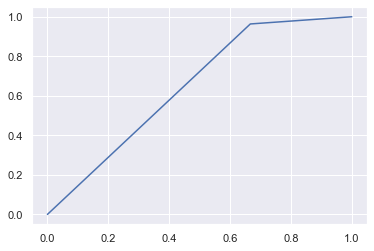

In [218]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr)

In [110]:
clf.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovo',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

### BPN

In [221]:
import torch
import torch.nn as nn
import torch.nn.functional as Fun

class Net(torch.nn.Module):
    def __init__(self, n_feature, n_output):
        super(Net, self).__init__()
        self.hidden1 = torch.nn.Linear(n_feature, 15)
        self.hidden2 = torch.nn.Linear(15, 15)
        self.hidden3 = torch.nn.Linear(15, 8)
        self.out = torch.nn.Linear(8, n_output)
        
    def forward(self, x):
        x = Fun.relu(self.hidden1(x))
        x = Fun.relu(self.hidden2(x))
        x = Fun.relu(self.hidden3(x))
        x = self.out(x)
        return x

In [222]:
x_train, x_test, y_train, y_test = train_test_split(
    features, labels, test_size=0.2, random_state=0, shuffle=True
)

In [223]:
features_nn = torch.FloatTensor(x_train.to_numpy())
label_nn = torch.LongTensor(y_train.to_numpy())

In [224]:
net = Net(20, 2)
optimizer = torch.optim.SGD(net.parameters(), lr=0.05)
loss_func = torch.nn.CrossEntropyLoss()

In [225]:
for i in range(1000):
    out = net(features_nn)
#     print(f"{out[:, 0]=}")
#     print(f"{label_nn.shape=}")
    loss = loss_func(out, label_nn)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

In [226]:
out = net(torch.FloatTensor(x_test.to_numpy()))
prediction = torch.max(out, 1)[1]
pred_y = prediction.numpy()

In [227]:
pred_y

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

In [228]:
1. - np.sum(np.abs(pred_y - y_test)) / y_test.size

0.75

In [229]:
fpr, tpr, thresholds = metrics.roc_curve(y_test.to_numpy(), pred_y)

In [231]:
fpr

array([0.        , 0.54411765, 1.        ])

In [232]:
tpr

array([0.        , 0.90151515, 1.        ])

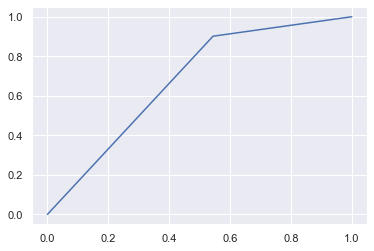

In [230]:
fig, ax = plt.subplots()

ax.plot(fpr, tpr)